# Bag of Viual Words


Here we'll be doing:



*   Make dataset.
*   Make list of descriptors( to extract local features using ORB).
*   Use K-means to make clusters of these extracted features.
*   Use cluster centeres to represent particular cluster.
*   Build histogram of train images( these contain feature count of same cluster in a image).
*   Fit a KNN on these histograms to compare an unseen image.
*  Plot a histogram showing found train features in sample image vs thier frequency. 



In [0]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [2]:
train_ds = tfds.load('horses_or_humans', split='train',as_supervised=True, shuffle_files=True)
train_ds = train_ds.take(500)

test_ds = tfds.load('horses_or_humans', split='test', shuffle_files=True, as_supervised=True)
test_ds = test_ds.take(20)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete2UEPK6/horses_or_humans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete2UEPK6/horses_or_humans-test.tfrecord


Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [29]:
isinstance(train_ds, object)

True

In [0]:
# function builds historam of local features with thier counts

def build_histogram(descriptor_list, kmeans):
    histogram = np.zeros(len(kmneans_centers))
    cluster_result =  kmeans.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
# make list of descriptors

descriptors = [] # all images descriptors

orb = cv2.ORB_create(200)

for i, (image, label) in enumerate(tfds.as_numpy(train_ds)):

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, descriptor = orb.detectAndCompute(gray, None)
  
  descriptors.extend(descriptor)


In [0]:
# fit kmeans on descriptors and kmeans centers

kmeans = KMeans(50, n_jobs=-1)

kmeans.fit(descriptors)
kmneans_centers = kmeans.cluster_centers_

In [0]:
# build histogram of train data

# contains number of features per image(features frqeuncy in each image)
local_train_features = [] 

for i, desc in enumerate(descriptors):

  # descriptors_dict[i] = descriptor
  hist = build_histogram(descriptor, kmeans)
  local_train_features.append(hist)


In [0]:
# use kmeans to compare histograms with train data

neighbor = NearestNeighbors(n_neighbors = 20) # 20 nearest features
neighbor.fit(local_train_features)

In [0]:
# test for one sample

test_sample_ds = test_ds.take(1)
eg = [image for image, label in tfds.as_numpy(test_sample_ds)]

data = cv2.cvtColor(eg[0], cv2.COLOR_BGR2GRAY)
_, descriptor = orb.detectAndCompute(data, None)
histogram = build_histogram(descriptor, kmeans)

dist, result = neighbor.kneighbors([histogram])

In [15]:
# 20 nearest features indexes

result

array([[11932,     8,     0,     7,  5963, 95490,     3,     6,   364,
         2978, 23869, 47743,     1,     2,     4,     5,    82,   738,
         1485,   176]])

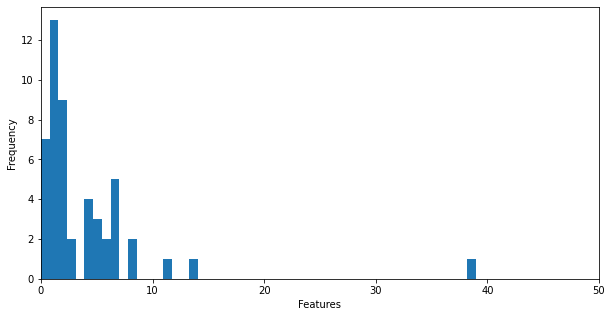

In [9]:
# plot the histogram of features and thier frequency

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

plt.hist(histogram, bins=50)
plt.xlim(0,50)
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

Summary:</br>
With the histogram computed of test data, it can be compared with training features to find the match of features. If the computed train local features labeled they can be matched to find class of image. </br>Like 30 features from class1, 50 features matched from class2, So image is classified as class2.